# Lab assignment: perceptron training

### Submitted by: Jorge de la Torre Garcia (26260320R), Lydia Phoebe Amanda Lilius (DNI), Miguel Galán Cisneros (77665422B), Vitor Oliveira de Souza (Z0963220P)

In this assignment we will learn how perceptrons work and are trained.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>


During the assignment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **scikit-learn**

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells.

Let's go!

## The AND and OR problems

Let us define the AND and OR problems in the **dataset** form we will be using throughout this assignment. A dataset is composed of two matrices X and Y, storing respectively the **inputs** fed to the networks and the desired **outputs** or **targets** for such inputs. We will use numpy's arrays for this purpose:

In [37]:
import numpy as np
X_and = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
Y_and = np.array([[0], [0], [0], [1]])
X_or = X_and.copy()    # same inputs as for AND
Y_or = np.array([[0], [1], [1], [1]])
print(X_and)
print(Y_and)
print(X_or)
print(Y_or)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [0]
 [0]
 [1]]
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [1]]


Note that in the patterns above we have prepended a 1, so that the **weights** **w** also include the **bias** term b and a dot product of the form **w**·**x** actually computes **w**·**x** + b. Hence, in this particular case **w** = (b, w1, w2).

## Perceptrons

As you have seen in the theory, **perceptrons** are based on the **McCulloch-Pitts neuron**, which is a simplified version of a neuron in the human brain. The **activation function** of this neuron is 1 when its inputs are greater than or equal to 0, and 0 otherwise:

In [38]:
def step_activation(x):
    return 1*(x >= 0)   # multiply by 1 to change from boolean to int

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Figure out by yourself some values for <b>w</b> which solve the AND and OR problems. Store them in 2 variables called <b>w_and</b> and <b>w_or</b>.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
It may help if you print the points in (x1, x2) axes and interpret <b>w</b> and b as a hyperplane.
 </td></tr>
</table>

Text(0.5, 1.0, 'AND problem')

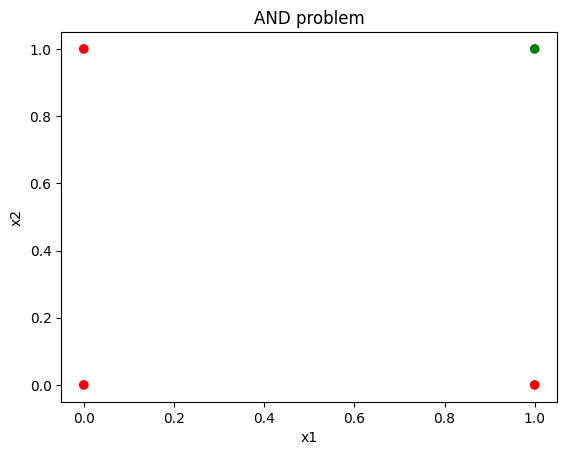

In [39]:
####### INSERT YOUR CODE HERE

import matplotlib.pyplot as plt
%matplotlib inline

x_plot = X_and[:, 1:]
plt.scatter(x_plot[:,0],x_plot[:,1], color=['r' if y == 0 else 'g' for y in Y_and])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AND problem')

In [40]:
w_and = np.array([-1.5,1,1])
step_activation(X_and.dot(w_and))

array([0, 0, 0, 1])

Text(0.5, 1.0, 'OR problem')

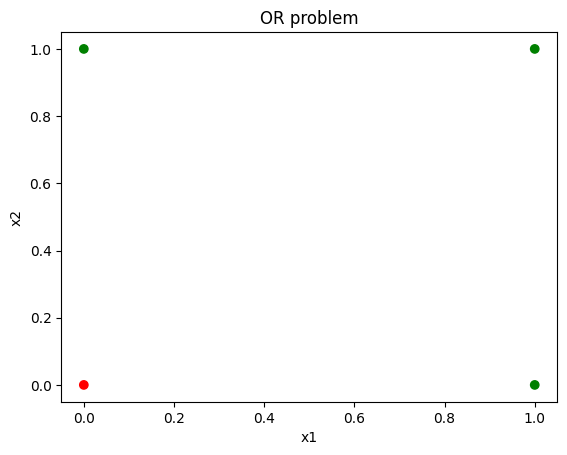

In [41]:
plt.scatter(x_plot[:,0],x_plot[:,1], color=['r' if y == 0 else 'g' for y in Y_or])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('OR problem')

In [42]:
w_or = np.array([-0.5,1,1])
step_activation(X_or.dot(w_or))

array([0, 1, 1, 1])

If your weights are correct, the following should output true:

In [43]:
print(np.all(step_activation(X_and.dot(w_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or)) == Y_or.ravel()))

True
True


Observe that we are already taking advantage of **matrix calculus**: by multiplying above the input matrix with the weight vector we can simultaneously obtain the perceptron's outputs for all patterns. Then we just need to compare whether those outputs are actually the desired ones.

Let us code now **Rosenblatt's perceptron**, so that it learns automatically **w_and** and **w_or** for us, as they are both **linearly separable** problems.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement Rosenblatt's perceptron in a function called **perceptron_learn**. The inputs should be the X and Y matrices for the problem to be solved, and the output should be the **w** vector comprising both the bias and the actual weights.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Rosenblatt's algorithm operates in an **online** way, so you cannot take advantage of matrix calculus, as the weight vector **w** may change with every single pattern.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
For comparison purposes, initialize **w = 0**. The function **zeros** in numpy does exactly this.
 </td></tr>
</table>

In [44]:
####### INSERT YOUR CODE HERE

def perceptron_learn(X, Y, w = None):
    if w is None:
        w = np.zeros(X[0].size) # Initialize to zero if no weights are provided
    cont = 0
    error = True
    while(error == True):
        error = False
        for i in range(len(X)):
            o = step_activation(w.dot(X[i]))
            if (o != Y[i][0]):
                w = w + (Y[i][0] - o) * X[i]
                error = True
        cont+=1
        if (cont == 1000):
            print("Max iter reached")
            break

    if (cont < 1000):
        print (str(cont) + " epochs needed for convergence.")
    return w

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Test your implementation with the AND and OR problems. How many **epochs** are needed for convergence? What values do you get for **w_and** and **w_or**?
 </td></tr>
</table>

In [45]:
####### INSERT YOUR CODE HERE
perceptron_and = perceptron_learn(X_and, Y_and)
print(perceptron_and)

6 epochs needed for convergence.
[-3.  2.  1.]


In [46]:
perceptron_or = perceptron_learn(X_or, Y_or)
print(perceptron_or)

4 epochs needed for convergence.
[-1.  1.  1.]


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that these new values for **w_and** and **w_or** do solve the respective problems. What happens if you initialize weights differently in **perceptron_learn**?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Although Rosenblatt's algorithm states that all weights should be initialized to 0, you can initialize them randomly and convergence is still guaranteed.
 </td></tr>
</table>

In [47]:
print(np.all(step_activation(X_and.dot(perceptron_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(perceptron_or)) == Y_or.ravel()))

True
True


In [48]:
####### INSERT YOUR CODE HERE

#Here we will run the same algorithm but with different initial weights

weights = np.array([[1,1,1],[1,0,-1],[-3,3,3]])

for w_ in weights :
    aux = perceptron_learn(X_and,Y_and, w_)
    print(aux)

6 epochs needed for convergence.
[-3  2  1]
7 epochs needed for convergence.
[-3  2  1]
2 epochs needed for convergence.
[-4  3  2]


##### For the first 2 initial vectors that we tried, we obtained the same final w that with the previous implementation. For the other vector we obtained a different solution. Does it solve the AND problem?

In [49]:
print(np.all(step_activation(X_and.dot(np.array([-4,3,2]))) == Y_and.ravel()))

True


##### Notice that with this initial weights the algorithm needed less epochs to converge, that is because the initial vector is "closer" to a w that solves the problem than the other initial weights that we tried. 
##### This behaviour can be supported by the fact that indeed the good initial state definition is important to better and faster convergence in neural networks

In [50]:
for w_ in weights :
    aux = perceptron_learn(X_or,Y_or, w_)
    print(aux)

3 epochs needed for convergence.
[-1  1  1]
6 epochs needed for convergence.
[-1  1  1]
1 epochs needed for convergence.
[-3  3  3]


##### Here we are in a very similar situation to the previous case: in two instances we obtained the same w vector as initiating with the vector 0, and we obtain a different solution that, as we can see, is also valid:

In [51]:
print(np.all(step_activation(X_or.dot(np.array([-3,3,3]))) == Y_or.ravel()))

True


Let us compare our implementation with that of *scikit-learn*. The class which implements a perceptron is **Perceptron**:

In [52]:
from sklearn.linear_model import Perceptron
Perceptron()

Perceptron()

In order to make things comparable, we need no regularization and not shuffling the patterns in each epoch:

In [53]:
percep = Perceptron(alpha = 0.0, shuffle=False)

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Train the scikit-learn perceptron for the AND and OR problems. Do you obtain the same values for **w_and** and **w_or**? Why/why not?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Make sure that the parameter **n_iter** is at least as large as the number of epochs you obtained before.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Since *scikit-learn* splits weights (**coef_**) from biases (**intercept_**), we do not need to prepend anymore a 1 to the patterns. Be careful when feeding them to the **fit** method. Also, take this into account when checking the perceptron's output and comparing it to the one obtained with your method **perceptron_learn**.
 </td></tr>
</table>

In [54]:
####### INSERT YOUR CODE HERE

# We write "fit_intercept = False" so that when feeding the data to the perceptron through the "fit" method, it won't compute biases (b = [0,0,0]).
# We do this so we can better compare the output to the one obtained with our implementation.

percep_and = Perceptron(alpha = 0.0, shuffle=False, max_iter=20)
percep_or = Perceptron(alpha = 0.0, shuffle=False, max_iter=20)

percep_and.fit(X_and[:, 1:], Y_and.ravel()) # X_and[:, 1:] make sure we only send the input data to the Perceptron and not the 1 regarding to bias calculation
percep_or.fit(X_or[:, 1:], Y_or.ravel())

print(f"w_and =[{str(percep_and.intercept_[0])},{str(percep_and.coef_[0][0])},{percep_and.coef_[0][1]}]") # Answer pattern w = (b, w1, w2)
print(f"Number of epochs needed to reach w_and : {str(percep_and.n_iter_)}")

print(f"w_and =[{str(percep_or.intercept_[0])},{str(percep_or.coef_[0][0])},{percep_or.coef_[0][1]}]")
print(f"Number of epochs needed to reach w_or : {str(percep_or.n_iter_)}")

w_and =[-4.0,3.0,2.0]
Number of epochs needed to reach w_and : 10
w_and =[-1.0,2.0,2.0]
Number of epochs needed to reach w_or : 8


#### The trained weights could or couldn't be the same we trained in our method, because the final weights will depend on how they were initialized. As we showed in our last experiment.

## The XOR problem

As you know from the theory, Rosenblatt's perceptrons can only solve **linearly separable** problems. The AND and OR problems fall into this category, but the XOR problem does not.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Define the XOR problem in two matrices **X_xor**, **Y_xor** as we did above for the AND and OR problems.
 </td></tr>
</table>

Text(0.5, 1.0, 'XOR problem')

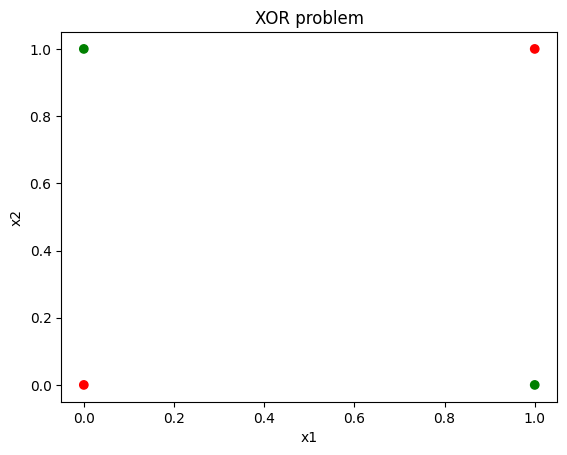

In [55]:
####### INSERT YOUR CODE HERE
X_xor = X_and.copy()
Y_xor = np.array([[0], [1], [1], [0]])

# Plot XOR problem
plt.scatter(x_plot[:,0],x_plot[:,1], color=['r' if y == 0 else 'g' for y in Y_xor])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR problem')

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that **perceptron_learn** does not converge when given the XOR problem.
 </td></tr>
</table>

##### When we implemented the "perceptron_learn" method, we did it in such a way that if after 1000 epochs we haven't obtained a w vector that solves the problem we will assume the method does not converge and stop iterating.

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Introduce some control to exit the function after a maximum number of epochs has been reached. Otherwise, execution will go on forever and can stall your PC.
 </td></tr>
</table>

In [56]:
####### INSERT YOUR CODE HERE
perceptron_learn(X_xor,Y_xor)

Max iter reached


array([ 0., -1.,  0.])

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that scikit-learn's **Perceptron** does not converge either for the XOR problem.
 </td></tr>
</table>

In [57]:
####### INSERT YOUR CODE HERE
percep_xor = Perceptron(alpha = 0.0, shuffle=False,max_iter=20)
percep_xor.fit(X_xor[:,1:], Y_xor.ravel())
print(f"w_xor =[{str(percep_xor.intercept_[0])},{str(percep_xor.coef_[0][0])},{percep_xor.coef_[0][1]}]") # Answer pattern w = (b, w1, w2)

w_xor =[0.0,0.0,0.0]


##### When using the scikit-learn implementation, we obtain w = (0,0,0), wich obviously doesn't solve the XOR problem,so we can say this method does not converge either.

## Multilayer perceptrons

Because of the limitations perceptrons have, **multilayer perceptrons (MLPs)** are usually the choice when dealing with general problems. Let us use for now the following class for an MLP:

In [58]:
class MLP(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

So that an MLP is initialized with a list specifying the sizes of the different layers. For instance:

In [59]:
sizes = [2, 3, 1]
net = MLP(sizes)

Creates an MLP with 2 input neurons, 3 hidden neurons and 1 output neuron. <u>Note also the convention of the weights: they are created in such a way that *weights[i][j][k]* denotes the weight connecting neuron k of the i-th layer to neuron j of the (i+1)-th layer</u> (assuming that input layer is layer 0, first hidden layer is layer 1, and so on). <u>The same logic applies for biases, so that *biases[i][j]* is the bias of neuron j of the (i+1)-th layer</u>.

In [60]:
print("Number of layers: " + str(net.num_layers))
print("Sizes of layers: " + str(net.sizes))
print("Biases of hidden layer: " + str(net.biases[0]))
print("Biases of output layer: " + str(net.biases[1]))
print("Weights between input and hidden layer: " + str(net.weights[0]))
print("Weights between hidden and output layer: " + str(net.weights[1]))

Number of layers: 3
Sizes of layers: [2, 3, 1]
Biases of hidden layer: [[ 2.46294696]
 [-1.18032289]
 [ 0.23065963]]
Biases of output layer: [[-0.10122291]]
Weights between input and hidden layer: [[ 0.416527   -0.23135909]
 [-1.18837521 -0.24936538]
 [ 1.33287648 -1.1864675 ]]
Weights between hidden and output layer: [[ 2.12687754  0.06186124 -1.29478794]]


Let us assume for simplicity that all **activation functions** in our MLPs are going to be the *step_activation* defined above. Note that its implementation is vectorized, so that it works both for scalars and numpy arrays.

We can now easily program the **forward phase** of the **back-propagation** algorithm, that is, to input a pattern to the network and compute the network's outputs.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement the function **forward_phase(mlp, x)** that, given an MLP and an input vector **x**, computes the MLP's outputs when **x** is fed.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of matrix calculus. Make sure to reshape the input vector to column form, so that the matrix-vector products do not raise errors.
 </td></tr>
</table>

In [61]:
test = X_and[:,1:][1].reshape(-1,1)
np.dot(net.weights[0],test) + net.biases[0]

array([[ 2.23158787],
       [-1.42968827],
       [-0.95580787]])

In [62]:
####### INSERT YOUR CODE HERE

def forward_phase(mlp,x):
    layer_input = x.reshape(-1,1) # Input of the first hidden layer is the input vector
    for i in range(mlp.num_layers -1):
        layer_input = step_activation(np.dot(mlp.weights[i],layer_input) + mlp.biases[i]) #Calculates the input for the next layer
    return layer_input

forward_phase(net,X_xor[:,1:][0]) # Example of one forward step

array([[1]])

Since weights in the MLP class are initialized randomly, it is very unlikely that these initial weights actually solve the XOR problem.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Check whether the MLP created above does solve XOR or not.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Again, the MLP class splits weights from biases, so you should not feed to the networks the ones prepended to the patterns.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Because of matrix calculus, the return of **forward_phase** will be in matrix form, when it is actually a scalar since there is only a single output neuron. You may need to flatten return values to compare them to the actual outputs.
 </td></tr>
</table>

In [63]:
####### INSERT YOUR CODE HERE
for x in X_xor[:,1:]:
    print(forward_phase(net,x)[0])

[1]
[1]
[1]
[1]


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Build an MLP that actually solves XOR.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
You know from the theory that it suffices with a hidden layer of just 2 neurons. Because we have not coded any learning algorithm (we would need to program the whole back-propagation algorithm for that), you will have to set directly its weights and biases so that it does the job.
 </td></tr>
</table>

In [64]:
Y_xor.ravel()

array([0, 1, 1, 0])

In [65]:
# Let's try to train a MLPClassifier so we can use it's parameters to try to fit our own MLP model
# Although the activation function is different from MLPClassifier and our step activation function, the weights can be similar to what we need
# SKlearn uses relu as standard activation function, that is similar to the Step
'''
Here's why relu is considered similar to a step function:
    -> Zeroing Negative Inputs: Like a step function, which outputs zero for inputs below a certain threshold, 
    relu outputs zero for any negative input.
    -> Linear for Positive Inputs: For any input greater than zero, relu acts as a linear function, allowing positive
    inputs to pass through unchanged. This is somewhat similar to a step function, which outputs one (or another positive 
    constant value) for inputs above the threshold.
'''

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

X_xor_sub = X_xor[:,1:]
big_dataset = np.tile(X_xor_sub, (100, 1))
Y_xor_sub = Y_xor.ravel()
big_answer = np.tile(Y_xor_sub, (100))

clf = MLPClassifier(random_state=23,hidden_layer_sizes=[2],solver='sgd',learning_rate_init=0.01,max_iter = 10000).fit(big_dataset, big_answer)
ypred = clf.predict(X_xor[:,1:])
print(ypred)
print(f"Accuracy: {accuracy_score(y_true=Y_xor.ravel(), y_pred=ypred)}")
print(f"weights = {str(clf.coefs_)}")
print(f"biases = {str(clf.intercepts_)}")

[0 1 1 0]
Accuracy: 1.0
weights = [array([[2.91573385, 2.23415389],
       [2.91575234, 2.23201171]]), array([[-5.03649358],
       [ 2.88079317]])]
biases = [array([-2.91583585e+00, -4.20238432e-04]), array([-2.49577942])]


In [66]:
####### INSERT YOUR CODE HERE

sizes = [2, 2, 1]
net_xor = MLP(sizes)
'''
net_xor.weights[0] = np.array([[2.5,2],[2.5,2]])
net_xor.biases[0] = np.array([[-3],[-0.5]])
net_xor.weights[1] = np.array([[-5,3]])
net_xor.biases[1] = np.array([[-2.5]])
'''
net_xor.weights[0] = clf.coefs_[0]
net_xor.weights[1] = clf.coefs_[1].reshape(1,2)
net_xor.biases[0] = clf.intercepts_[0].reshape(2,1)
net_xor.biases[1] = clf.intercepts_[1].reshape(1,1)

In [67]:
for x in X_xor[:,1:]:
    print(forward_phase(net_xor,x)[0])

[0]
[1]
[1]
[0]


Coding oneself the back-propagation algorithm is tedious and prone to errors (especially the **backward phase**), so it is only useful as an academic programming exercise. In practice, one resorts to implementations already available. *Scikit-learn* has two classes for MLPs, the **MLPClassifier** and the **MLPRegressor**:

In [68]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
print(MLPClassifier())
print(MLPRegressor())

MLPClassifier()
MLPRegressor()


The only differences between the two are the **loss function** (**cross-entropy** for classification, **MSE** for regression) and the activation function of the output layer (**sigmoid** for classification, **identity** for regression). As you can see, the parameters used in construction are exactly the same ones, as well as the default values.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Discuss which of the above parameters you can identify with those seen in the theory slides and which you cannot.
 </td></tr>
</table>

#### We've seen both parameters in the theory slides.

##### Loss function: Mean squared error is the loss funtion usually used for regression problems, not only for the multi-layer perceptron. Cross-entropy refers to the "log loss" function, which penalizes incorrect classifications with increasing severity as the prediction diverges from the true class label.
##### Activation function: Determines the output of each neuron of the output layer. As we saw on class, using identity as the activation function in the output layer is what allows regression. Sigmoid is usually used for classification because it's covenient for calcullating the gradient as we studied in class.

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
Take some classification dataset used in the SVM assignments and fit an *MLPClassifier* by modifying the parameters you deem appropriate. Report the best network configuration you can find. Can you beat the best SVM you obtained for that problem?
 </td></tr>
</table>

##### We will use the "adult1" dataset used in the SVM assignment. In a usual situation we wouln't usually do cross-validation for a neural network model due to it's computational cost. But for the purpose of this assignment (and because we have a small dataset) we will use "GridSearchCV" for cross-validation.

In [22]:
from sklearn.datasets import load_svmlight_files
X_train, y_train, X_test, y_test = load_svmlight_files(("./data/adult1.svm", "./data/adult1_test.svm"))

In [23]:
# We will use the same standard scaler as in the SVM assignment
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pl = Pipeline([
    ('standard_scaler', StandardScaler(with_mean=False)),
    ('mlpc', MLPClassifier(random_state=10))
])

##### Because of the computational cost that we already mentioned, we aren't able to use a lot of parameters in GridSearchCV, so we picked a few that we considered significant.

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# After a lot of trial and error, we found that the best parameters 
# for the MLPClassifier for this dataset are the following:
parameter_grid = {
    'mlpc__hidden_layer_sizes': [(7,)],
    'mlpc__activation': ['logistic'],
    'mlpc__solver': ['sgd'],
    'mlpc__learning_rate': ['adaptive'],
    'mlpc__max_iter': [800],
}

gs = GridSearchCV(pl, parameter_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler',
                                        StandardScaler(with_mean=False)),
                                       ('mlpc',
                                        MLPClassifier(random_state=10))]),
             n_jobs=-1,
             param_grid={'mlpc__activation': ['logistic'],
                         'mlpc__hidden_layer_sizes': [(7,)],
                         'mlpc__learning_rate': ['adaptive'],
                         'mlpc__max_iter': [800], 'mlpc__solver': ['sgd']},
             scoring='accuracy')

In [26]:
my_best_estimator = gs.best_estimator_
y_pred = my_best_estimator.predict(X_test)
print("Best model: " + str(my_best_estimator))
print("Accuracy on train:" + str(gs.best_score_))
print("Accuracy on test:" + str(accuracy_score(y_true=y_test, y_pred=y_pred)))

Best model: Pipeline(steps=[('standard_scaler', StandardScaler(with_mean=False)),
                ('mlpc',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=(7,),
                               learning_rate='adaptive', max_iter=800,
                               random_state=10, solver='sgd'))])
Accuracy on train:0.826791277258567
Accuracy on test:0.8423245897402766


##### We obtained a pretty much identical accuracy than with the SVC model: 84.2%, whereas SVM obtained 84.3%. 
##### We can say that we didn't beat the best SVM model for this problem, but we were able to compete with it.
##### It looks that due to the nature of the data, it is very hard to go past this threshold.

##### Let's try again with the gaussian dataset:

In [27]:
# Try 2 - compete with 89.2% of the gaussian quantiles dataset
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
RND_STATE = 42
# Create the identical dataset
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, n_classes=2, random_state=RND_STATE)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=RND_STATE)
X = np.concatenate((X1, X2))
X[:, 0] *= 10
X[:, 1] /= 10
y = np.concatenate((y1, -y2+1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RND_STATE)

In [28]:
# Use the same standard scaler as in the SVM assignment
pl = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('mlpc', MLPClassifier(random_state=RND_STATE))
])

In [30]:
# We tried a lot of different parameters, but the best we could get was the following:
parameter_grid = {
    'mlpc__hidden_layer_sizes': [(6,6,6)],
    'mlpc__activation': ['tanh'],
    'mlpc__solver': ['sgd'],
    'mlpc__learning_rate': ['adaptive'],
    'mlpc__learning_rate_init': [0.09],
    'mlpc__max_iter': [900],
}
gs = GridSearchCV(pl, parameter_grid,  cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('mlpc',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'mlpc__activation': ['tanh'],
                         'mlpc__hidden_layer_sizes': [(6, 6, 6)],
                         'mlpc__learning_rate': ['adaptive'],
                         'mlpc__learning_rate_init': [0.09],
                         'mlpc__max_iter': [900], 'mlpc__solver': ['sgd']},
             scoring='accuracy', verbose=1)

In [31]:
my_best_estimator = gs.best_estimator_
y_pred = my_best_estimator.predict(X_test)
print("Best model: " + str(my_best_estimator))
print("Accuracy on train:" + str(gs.best_score_))
print("Accuracy on test:" + str(accuracy_score(y_true=y_test, y_pred=y_pred)))

Best model: Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 6, 6),
                               learning_rate='adaptive',
                               learning_rate_init=0.09, max_iter=900,
                               random_state=42, solver='sgd'))])
Accuracy on train:0.8880000000000001
Accuracy on test:0.912


##### Success! We were able to beat the best SVM model for the gaussian problem, obtaining an accuracy of 91.2%, which is over the 89.2% obtained by the SVM model.
##### Lets compare the decision boundaries of the two models:

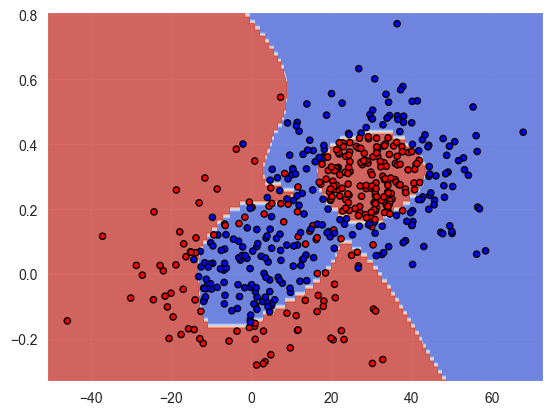

In [34]:
# Plotting the decision boundary
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# predict the class for each of the points in the grid
Z = my_best_estimator.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cm = ListedColormap(['#0000FF', '#FF0000']) 
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm, edgecolors='k', s=20)
plt.show()

<img src="img/svm_decision_boundary.png" style="width:600px;">
<caption>Decision boundary of the best SVM model</caption>

##### As we can see, the decision boundary of the MLP model is different to the SVM model! Cool!

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
Repeat with some regression dataset and an *MLPRegressor*. Are you able to beat the SVR?
 </td></tr>
</table>

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

pl2 = Pipeline([
    ('standard_scaler', StandardScaler(with_mean=False)),
    ('mlpr', MLPRegressor())
])

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = housing.data
y = housing.target


from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X,y):
    
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [ ]:
parameter_grid2 = {
    'mlpr__hidden_layer_sizes': [(100,), (100, 50)],
    'mlpr__solver': ['adam', 'sgd', 'lbfgs'],
    'mlpr__learning_rate': ['constant', 'adaptive'],
    'mlpr__learning_rate_init': [0.001, 0.01, 0.1],
    'mlpr__max_iter': [200, 300, 400],
    'mlpr__tol': [1e-4, 1e-3, 1e-2],
}

gs2 = GridSearchCV(pl2, parameter_grid2,  cv=5, scoring='r2', n_jobs=-1)
gs2.fit(X_train, y_train)

In [ ]:
my_best_estimator2 = gs2.best_estimator_

In [ ]:
my_best_estimator2.get_params

In [ ]:
my_escaler = StandardScaler(with_mean = False)

my_escaler.fit(X_train)
X_test_norm = my_escaler.transform(X_test)
y_pred = my_best_estimator2.predict(X_test_norm)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Beware of normalizing your data before feeding them to an MLP. It is advised to use a pipeline with a *StandardScaler*.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Once in a pipeline, you can use grid search to try different choices for the MLP parameters.
 </td></tr>
</table>

<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>